In [119]:
import pandas as pd
pd.set_option('display.max_columns', 200) 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [132]:
df= pd.read_csv('weatherAUS.csv')

In [133]:
df.iloc[:20, :]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [134]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [135]:
df.dropna(subset=['RainTomorrow','RainToday'], inplace=True)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

In [137]:
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           503
Rainfall          679
Evaporation       355
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       545
Pressure3pm       548
Cloud9am           10
Cloud3pm           10
Temp9am           440
Temp3pm           500
RainToday           2
RainTomorrow        2
dtype: int64

In [138]:
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})
df['RainToday'] = df['RainToday'].map({'No': 0, 'Yes': 1})  


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

In [140]:
df.iloc[:20, :]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,0,0
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,0,0
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,0,0
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,0,1
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,1,0


In [141]:
df['Date']= pd.to_datetime(df['Date'])

In [142]:
df['Date_month'] = df['Date'].dt.month
df['Date_year'] = df['Date'].dt.year
df['Date_day'] = df['Date'].dt.day


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           140787 non-null  datetime64[ns]
 1   Location       140787 non-null  object        
 2   MinTemp        140319 non-null  float64       
 3   MaxTemp        140480 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81093 non-null   float64       
 6   Sunshine       73982 non-null   float64       
 7   WindGustDir    131624 non-null  object        
 8   WindGustSpeed  131682 non-null  float64       
 9   WindDir9am     131127 non-null  object        
 10  WindDir3pm     137117 non-null  object        
 11  WindSpeed9am   139732 non-null  float64       
 12  WindSpeed3pm   138256 non-null  float64       
 13  Humidity9am    139270 non-null  float64       
 14  Humidity3pm    137286 non-null  float64       
 15  Press

In [144]:
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           503
Rainfall          679
Evaporation       355
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       545
Pressure3pm       548
Cloud9am           10
Cloud3pm           10
Temp9am           440
Temp3pm           500
RainToday           2
RainTomorrow        2
Date_month         12
Date_year          11
Date_day           31
dtype: int64

In [145]:
df=df.drop(columns=['Date'])

In [146]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_year,Date_day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0,12,2008,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0,12,2008,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0,12,2008,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0,12,2008,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12,2008,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,0,0,6,2017,20
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0,0,6,2017,21
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0,0,6,2017,22
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0,0,6,2017,23


In [147]:
df.isnull().sum()

Location             0
MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustDir       9163
WindGustSpeed     9105
WindDir9am        9660
WindDir3pm        3670
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
RainToday            0
RainTomorrow         0
Date_month           0
Date_year            0
Date_day             0
dtype: int64

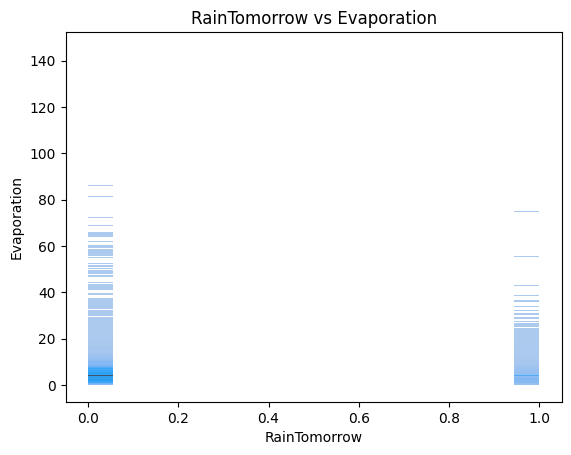

In [148]:
sns.histplot(data=df, x='RainTomorrow', y='Evaporation') 
plt.title('RainTomorrow vs Evaporation')
plt.show()  



In [153]:
from sklearn.feature_selection import mutual_info_classif

X_temp = df[['Evaporation']].dropna()
y_temp = df.loc[X_temp.index, 'RainTomorrow']

mi = mutual_info_classif(X_temp, y_temp)
print(f"Mutual Info Score for Evaporation: {mi[0]}")



Mutual Info Score for Evaporation: 0.00980259933348071


In [154]:
df=df.drop(columns=['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'],axis=1)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       140787 non-null  object 
 1   MinTemp        140319 non-null  float64
 2   MaxTemp        140480 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   WindGustDir    131624 non-null  object 
 5   WindGustSpeed  131682 non-null  float64
 6   WindDir9am     131127 non-null  object 
 7   WindDir3pm     137117 non-null  object 
 8   WindSpeed9am   139732 non-null  float64
 9   WindSpeed3pm   138256 non-null  float64
 10  Humidity9am    139270 non-null  float64
 11  Humidity3pm    137286 non-null  float64
 12  Pressure9am    127044 non-null  float64
 13  Pressure3pm    127018 non-null  float64
 14  Temp9am        140131 non-null  float64
 15  Temp3pm        138163 non-null  float64
 16  RainToday      140787 non-null  int64  
 17  RainTomorrow   140787 non-null  in

In [156]:
df.isnull().sum()


Location             0
MinTemp            468
MaxTemp            307
Rainfall             0
WindGustDir       9163
WindGustSpeed     9105
WindDir9am        9660
WindDir3pm        3670
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Temp9am            656
Temp3pm           2624
RainToday            0
RainTomorrow         0
Date_month           0
Date_year            0
Date_day             0
dtype: int64

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       140787 non-null  object 
 1   MinTemp        140319 non-null  float64
 2   MaxTemp        140480 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   WindGustDir    131624 non-null  object 
 5   WindGustSpeed  131682 non-null  float64
 6   WindDir9am     131127 non-null  object 
 7   WindDir3pm     137117 non-null  object 
 8   WindSpeed9am   139732 non-null  float64
 9   WindSpeed3pm   138256 non-null  float64
 10  Humidity9am    139270 non-null  float64
 11  Humidity3pm    137286 non-null  float64
 12  Pressure9am    127044 non-null  float64
 13  Pressure3pm    127018 non-null  float64
 14  Temp9am        140131 non-null  float64
 15  Temp3pm        138163 non-null  float64
 16  RainToday      140787 non-null  int64  
 17  RainTomorrow   140787 non-null  in

In [158]:
# Fill numerical columns with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical columns with mode
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


In [159]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Date_month       0
Date_year        0
Date_day         0
dtype: int64

In [160]:
df.duplicated().sum()

np.int64(0)

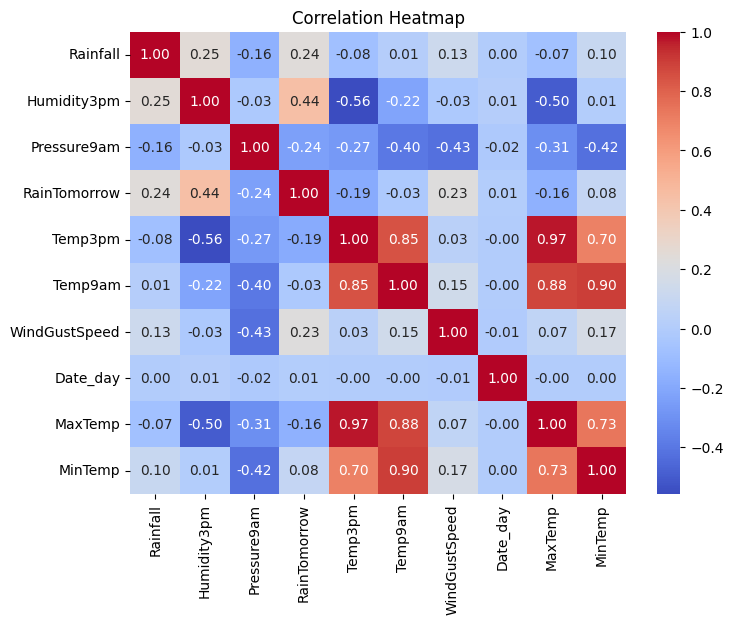

In [161]:
corr_matrix= df[['Rainfall', 'Humidity3pm', 'Pressure9am', 'RainTomorrow','Temp3pm','Temp9am','WindGustSpeed','Date_day','MaxTemp','MinTemp']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [162]:
for col in df.select_dtypes(include=['object']).columns:
    print(col)

Location
WindGustDir
WindDir9am
WindDir3pm


In [163]:
df = pd.get_dummies(df, drop_first=True)



In [164]:
df

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_year,Date_day,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,12,2008,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,12,2008,2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,12,2008,3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,12,2008,4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Columns: 110 entries, MinTemp to WindDir3pm_WSW
dtypes: bool(93), float64(12), int32(3), int64(2)
memory usage: 34.2 MB


In [166]:
df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_year,Date_day
count,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000
mean,12.184209,23.233735,2.349974,39.907754,13.983074,18.637772,68.839474,51.462983,1017.649250,1015.252294,16.985729,21.682127,0.223423,0.221618,6.403482,2012.757492,15.714704
std,6.393235,7.106800,8.465173,13.133963,8.853265,8.718790,18.961051,20.547147,6.749208,6.682548,6.480890,6.873294,0.416541,0.415337,3.426583,2.542272,8.798882
min,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,-7.200000,-5.400000,0.000000,0.000000,1.000000,2007.000000,1.000000
25%,7.600000,17.900000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,12.300000,16.700000,0.000000,0.000000,3.000000,2011.000000,8.000000
50%,12.000000,22.600000,0.000000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,16.700000,21.100000,0.000000,0.000000,6.000000,2013.000000,16.000000
75%,16.800000,28.200000,0.800000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,21.500000,26.300000,0.000000,0.000000,9.000000,2015.000000,23.000000
max,33.900000,48.100000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000,1.000000,1.000000,12.000000,2017.000000,31.000000


In [185]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# Separate X and y
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

# Scale features for chi2 (required: non-negative)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Select top 20 features
selector = SelectKBest(score_func=chi2, k=20)
X_top20 = selector.fit_transform(X_scaled, y)

# Get names of selected features
selected_features = X.columns[selector.get_support()]
print("Top 20 features:\n", selected_features)

# Keep only top 20 columns in original df
X_top = df[selected_features]


Top 20 features:
 Index(['Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Temp3pm', 'RainToday', 'Location_AliceSprings',
       'Location_Mildura', 'Location_Portland', 'Location_Uluru',
       'Location_Walpole', 'Location_Woomera', 'WindGustDir_ENE',
       'WindGustDir_NW', 'WindGustDir_W', 'WindDir9am_ESE', 'WindDir9am_NNW',
       'WindDir9am_SE', 'WindDir3pm_NW'],
      dtype='object')


In [186]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)




In [187]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [191]:
from imblearn.over_sampling import SMOTE
import pandas as pd

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:\n", y_train.value_counts())
print("After SMOTE:\n", pd.Series(y_train_smote).value_counts())


Before SMOTE:
 RainTomorrow
0    87689
1    24940
Name: count, dtype: int64
After SMOTE:
 RainTomorrow
0    87689
1    87689
Name: count, dtype: int64


In [204]:
model = LogisticRegression(max_iter=1000,class_weight='balanced', random_state=42)
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test_scaled)

In [205]:
X_rf = df.drop('RainTomorrow', axis=1)


In [206]:
X_train_rf, X_test_rf, y_train, y_test = train_test_split(X_rf, y, test_size=0.2, random_state=42)

In [207]:
rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42,class_weight='balanced')
rf_model.fit(X_train_rf, y_train)
y_pred_rf = rf_model.predict(X_test_rf)


In [208]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Logistic Regression:\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("\nRandom Forest:\n")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Logistic Regression:

Accuracy: 0.7727821578237091
[[17057  4840]
 [ 1558  4703]]
              precision    recall  f1-score   support

           0       0.92      0.78      0.84     21897
           1       0.49      0.75      0.60      6261

    accuracy                           0.77     28158
   macro avg       0.70      0.77      0.72     28158
weighted avg       0.82      0.77      0.79     28158


Random Forest:

Accuracy: 0.848994957028198
[[20054  1843]
 [ 2409  3852]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     21897
           1       0.68      0.62      0.64      6261

    accuracy                           0.85     28158
   macro avg       0.78      0.77      0.77     28158
weighted avg       0.84      0.85      0.85     28158



In [209]:
# If using scaled features, X_test must be unscaled for context
X_test_display = pd.DataFrame(X_test, columns=selected_features)
results = X_test_display.copy()

results['Actual_RainTomorrow'] = y_test.values
results['Predicted_RainTomorrow'] = y_pred


In [210]:
results['Actual_RainTomorrow'] = results['Actual_RainTomorrow'].map({0: 'No', 1: 'Yes'})
results['Predicted_RainTomorrow'] = results['Predicted_RainTomorrow'].map({0: 'No', 1: 'Yes'})


In [211]:
results.head(10)  # View first 10 predictions


,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Temp3pm,RainToday,Location_AliceSprings,Location_Mildura,Location_Portland,Location_Uluru,Location_Walpole,Location_Woomera,WindGustDir_ENE,WindGustDir_NW,WindGustDir_W,WindDir9am_ESE,WindDir9am_NNW,WindDir9am_SE,WindDir3pm_NW,Actual_RainTomorrow,Predicted_RainTomorrow
121459,0.0,33.0,41.0,34.0,1011.1,24.4,0,False,False,False,False,False,False,False,False,False,False,False,True,False,No,No
32051,0.0,43.0,76.0,52.0,1013.5,16.1,0,False,False,False,False,False,False,False,False,False,False,False,False,False,Yes,No
107700,0.0,52.0,21.0,9.0,1017.5,37.0,0,False,False,False,False,False,True,True,False,False,True,False,False,False,No,No
26526,0.0,54.0,47.0,44.0,1017.6,15.4,0,False,False,False,False,False,False,False,False,False,False,False,False,False,No,No
109566,2.4,39.0,58.0,53.0,1021.6,13.8,1,False,False,False,False,False,False,False,False,True,False,False,False,False,No,No
78129,0.0,15.0,100.0,78.0,1025.6,14.9,0,False,False,False,False,False,False,False,False,False,False,False,False,False,No,No
33034,0.0,63.0,67.0,60.0,1014.9,26.7,0,False,False,False,False,False,False,False,False,False,False,False,False,False,No,Yes
83947,2.2,22.0,98.0,77.0,1025.9,14.4,1,False,False,False,False,False,False,False,False,False,False,False,False,False,Yes,Yes
48343,0.0,41.0,86.0,46.0,1028.0,14.9,0,False,False,False,False,False,False,False,False,False,False,False,False,True,No,No
6517,0.0,20.0,60.0,26.0,1022.9,22.6,0,False,False,False,False,False,False,False,False,False,False,False,False,False,No,No


In [212]:
results['Match'] = results['Actual_RainTomorrow'] == results['Predicted_RainTomorrow']
results['Match'].value_counts()


Match
True     21760
False     6398
Name: count, dtype: int64

In [213]:
# Create DataFrame from test features
X_test_display_rf = pd.DataFrame(X_test_rf, columns=X_rf.columns)

# Combine with actual and predicted values
rf_results = X_test_display_rf.copy()
rf_results['Actual_RainTomorrow'] = y_test.values
rf_results['Predicted_RainTomorrow'] = y_pred_rf


In [214]:
rf_results['Actual_RainTomorrow'] = rf_results['Actual_RainTomorrow'].map({0: 'No', 1: 'Yes'})
rf_results['Predicted_RainTomorrow'] = rf_results['Predicted_RainTomorrow'].map({0: 'No', 1: 'Yes'})


In [215]:
rf_results.head(10)


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,Date_month,Date_year,Date_day,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,Actual_RainTomorrow,Predicted_RainTomorrow
121459,18.2,25.0,0.0,33.0,9.0,9.0,41.0,34.0,1011.1,1009.6,19.2,24.4,0,9,2010,30,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,No,No
32051,8.0,19.2,0.0,43.0,26.0,17.0,76.0,52.0,1013.5,1012.2,9.6,16.1,0,6,2013,18,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,Yes,No
107700,19.1,38.5,0.0,52.0,19.0,22.0,21.0,9.0,1017.5,1014.8,25.2,37.0,0,2,2015,6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,No,No
26526,8.4,17.5,0.0,54.0,22.0,26.0,47.0,44.0,1017.6,1015.2,13.5,15.4,0,9,2015,24,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,Fals

In [216]:
rf_results['Match'] = rf_results['Actual_RainTomorrow'] == rf_results['Predicted_RainTomorrow']
rf_results['Match'].value_counts()


Match
True     23906
False     4252
Name: count, dtype: int64